<a href="https://colab.research.google.com/github/doggest25/PCVK_Agusty/blob/main/week%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytesseract

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

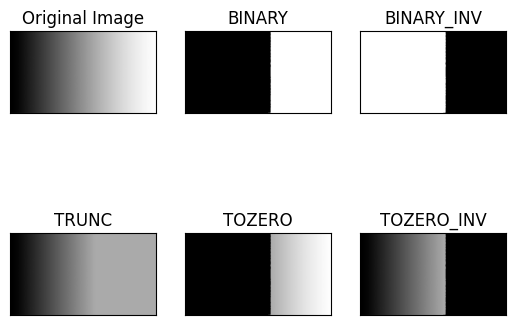

In [4]:
# Load Data gradient
gradient = cv2.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)
ret,thresh1 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gradient,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
gambar_gradientm4s = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(gambar_gradientm4s[i],'gray',vmin=0,vmax=255)  # vmin vmax untuk mengatur jangkauan intensitas piksel
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # menyembunyikan label sumbu x dan sumbu y

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


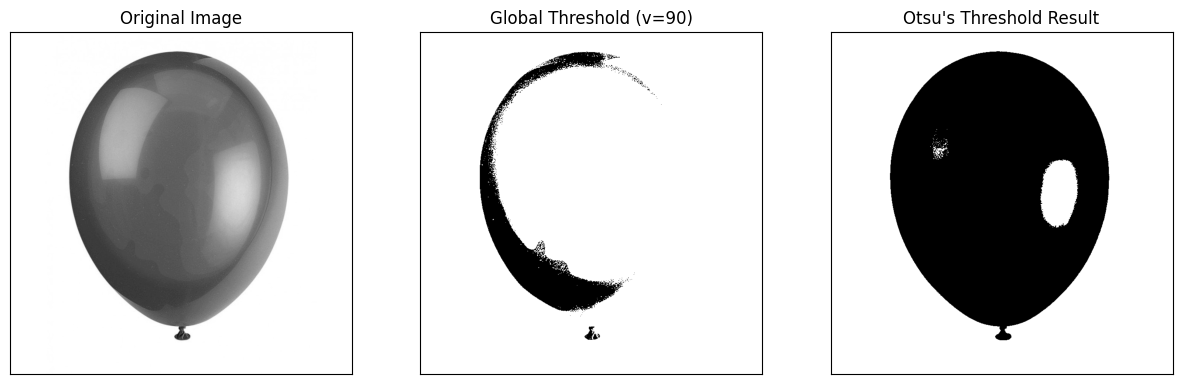

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def _compute_otsu_criteria(img, threshold):
    # Compute histogram for pixels below and above threshold
    hist_low = np.sum(img < threshold)
    hist_high = np.sum(img >= threshold)

    # Compute probabilities for pixels below and above threshold
    prob_low = hist_low / img.size
    prob_high = hist_high / img.size

    # Compute mean pixel values for pixels below and above threshold
    mean_low = np.mean(img[img < threshold]) if hist_low > 0 else 0
    mean_high = np.mean(img[img >= threshold]) if hist_high > 0 else 0

    # Compute between-class variance
    variance = prob_low * prob_high * (mean_low - mean_high) ** 2

    return variance


def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmax(criterias)]  # Otsu mencari threshold yang memaksimalkan variance

    binary = img.copy()
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary

if __name__ == '__main__':
    filename = '/content/drive/MyDrive/PCVK/Images/balloon.jpg'
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Global Threshold (v=90)
    global_threshold = 90
    _, global_thresholded = cv2.threshold(img, global_threshold, 255, cv2.THRESH_BINARY)

    # Otsu Thresholding
    otsu_thresholded = otsuThresholding(img)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, 'gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 2)
    plt.imshow(global_thresholded, 'gray')
    plt.title(f'Global Threshold (v={global_threshold})')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 3)
    plt.imshow(otsu_thresholded, 'gray')
    plt.title("Otsu's Threshold Result")
    plt.xticks([]), plt.yticks([])

    plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.
b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

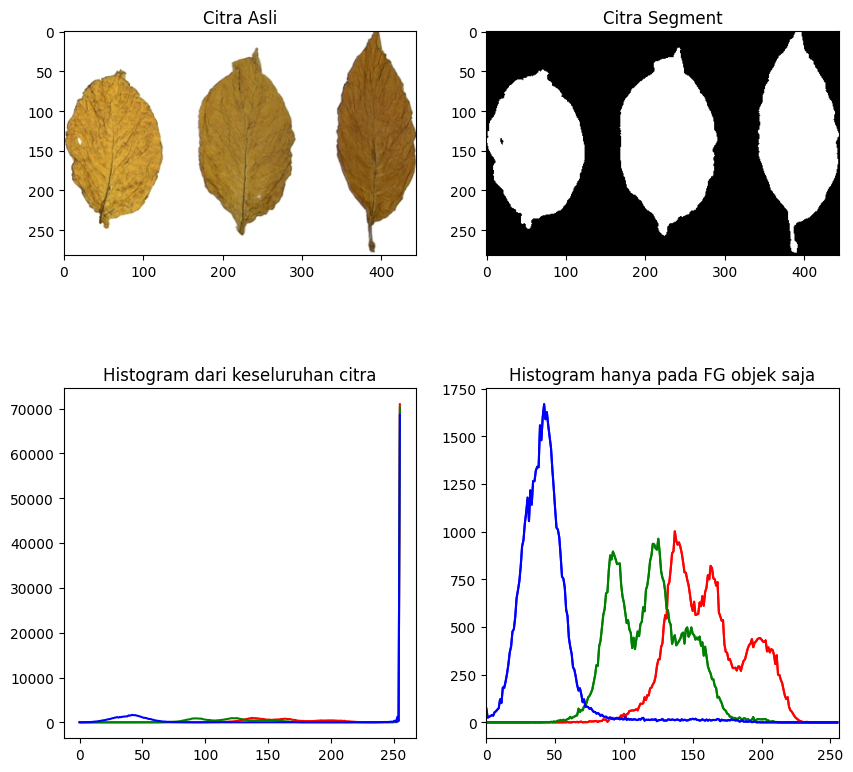

In [9]:
ktp = ('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
img_l = cv2.imread(ktp)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

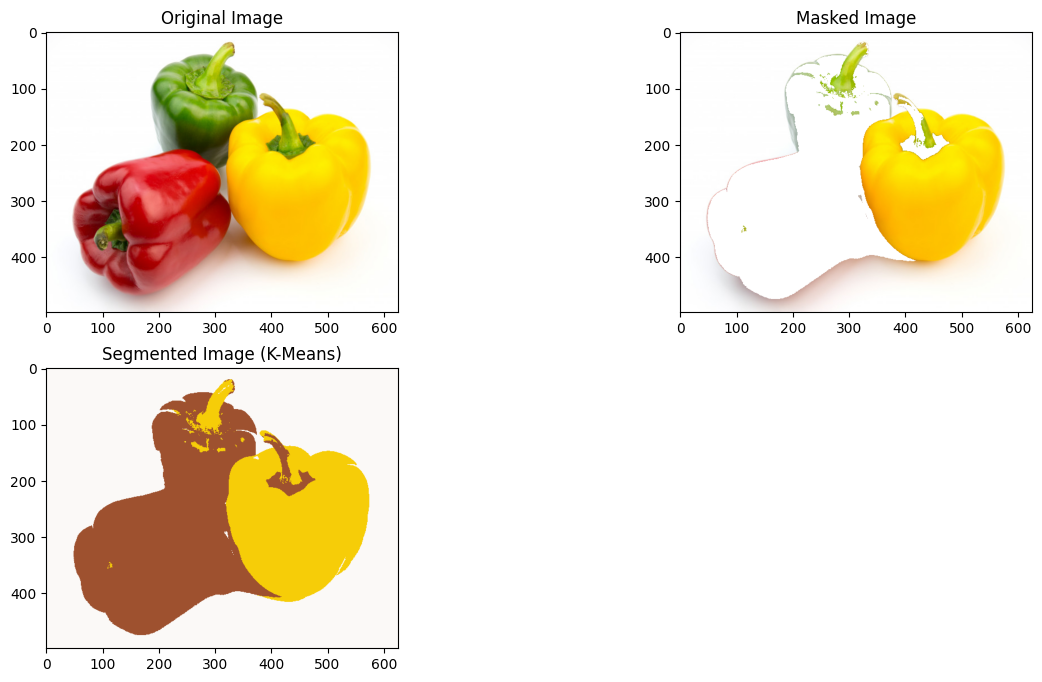

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
ktp = '/content/drive/MyDrive/PCVK/Images/peppers.jpg'
img = cv2.imread(ktp)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

1. Variasi Pencahayaan: Perbedaan intensitas cahaya pada gambar dapat mempengaruhi deteksi warna. Pencahayaan yang terlalu terang atau gelap menyebabkan warna yang sama terlihat berbeda. Hal ini karena pencahayaan mengubah nilai Value (atau intensitas cahaya) dalam ruang warna HSV, sehingga warna tertentu mungkin terdeteksi dengan akurasi yang rendah.

Warna yang Mendekati Target: Warna yang hampir mirip dengan warna yang ingin disegmentasi dapat tertangkap dalam kluster yang sama. Misalnya, warna kuning pucat atau kuning kehijauan dapat masuk ke dalam kluster warna kuning, meskipun tidak sepenuhnya sesuai. Ini bisa menyebabkan area yang bukan bagian dari target warna terdeteksi.

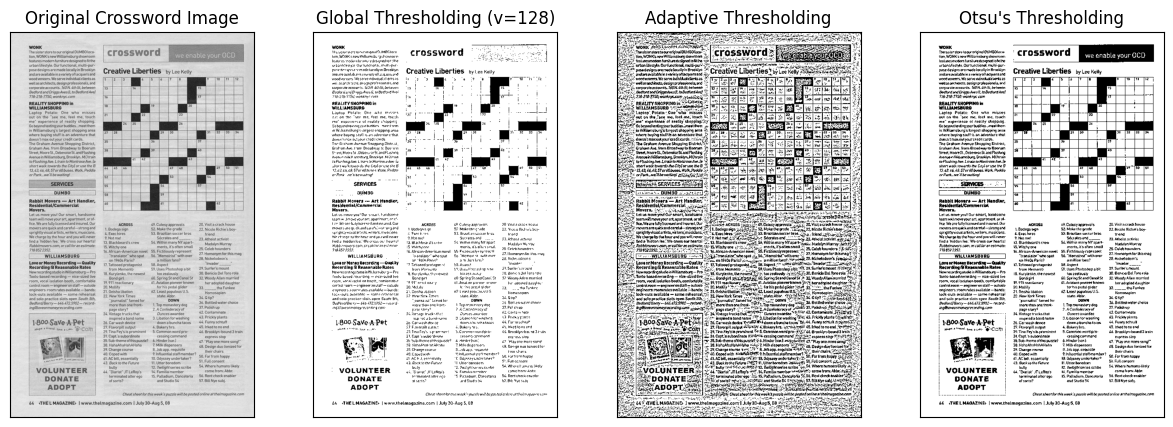

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
crossword_img = cv2.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Global Thresholding
global_threshold = 128
_, global_thresholded = cv2.threshold(crossword_img, global_threshold, 255, cv2.THRESH_BINARY)

# 2. Adaptive Thresholding
adaptive_thresholded = cv2.adaptiveThreshold(crossword_img, 255,
                                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY,
                                             11, 2)

# 3. Otsu’s Thresholding
otsu_threshold, otsu_thresholded = cv2.threshold(crossword_img, 0, 255,
                                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(crossword_img, cmap='gray')
plt.title('Original Crossword Image')
plt.xticks([]), plt.yticks([])

# Global Thresholding
plt.subplot(1, 4, 2)
plt.imshow(global_thresholded, cmap='gray')
plt.title(f'Global Thresholding (v={global_threshold})')
plt.xticks([]), plt.yticks([])

# Adaptive Thresholding
plt.subplot(1, 4, 3)
plt.imshow(adaptive_thresholded, cmap='gray')
plt.title('Adaptive Thresholding')
plt.xticks([]), plt.yticks([])

# Otsu's Thresholding
plt.subplot(1, 4, 4)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title("Otsu's Thresholding")
plt.xticks([]), plt.yticks([])

plt.show()
